In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('height_weight.csv')

In [3]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


### take the independent feature int the form of the data_frame

In [4]:
x=df[['Height']]
print(x)
print(type(x))

    Height
0     1.47
1     1.50
2     1.52
3     1.55
4     1.57
5     1.60
6     1.63
7     1.65
8     1.68
9     1.70
10    1.73
11    1.75
12    1.78
13    1.80
14    1.83
<class 'pandas.core.frame.DataFrame'>


### take the dependent(ouput) feature in the form of the data_series

In [5]:
y=df['Weight']
print(y)
print(type(y))

0     52.21
1     53.12
2     54.48
3     55.84
4     57.20
5     58.57
6     59.93
7     61.29
8     63.11
9     64.47
10    66.28
11    68.10
12    69.92
13    72.19
14    74.46
Name: Weight, dtype: float64
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Height-weight plot')

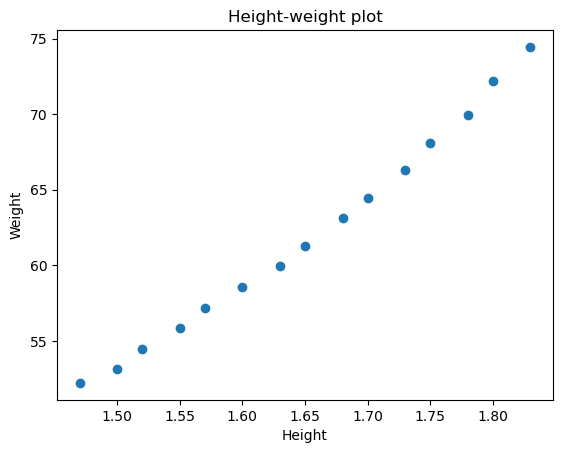

In [6]:
plt.scatter(x,y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height-weight plot")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
print(X_train)
print(y_train)

    Height
5     1.60
8     1.68
2     1.52
1     1.50
14    1.83
4     1.57
7     1.65
10    1.73
12    1.78
3     1.55
6     1.63
5     58.57
8     63.11
2     54.48
1     53.12
14    74.46
4     57.20
7     61.29
10    66.28
12    69.92
3     55.84
6     59.93
Name: Weight, dtype: float64


In [10]:
print(X_test)
print(y_test)

    Height
9     1.70
11    1.75
0     1.47
13    1.80
9     64.47
11    68.10
0     52.21
13    72.19
Name: Weight, dtype: float64


# standarization
 ## z=(x-u)s
 ### where u:mean of data , s: standard devistion
 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler=StandardScaler()

In [13]:
X_train=scaler.fit_transform(X_train)

In [14]:
print(X_train)

[[-0.39257558]
 [ 0.39257558]
 [-1.17772674]
 [-1.37401453]
 [ 1.86473401]
 [-0.68700727]
 [ 0.0981439 ]
 [ 0.88329506]
 [ 1.37401453]
 [-0.88329506]
 [-0.0981439 ]]


In [15]:
X_test=scaler.transform(X_test)

In [16]:
print(X_test)

[[ 0.58886337]
 [ 1.07958285]
 [-1.66844622]
 [ 1.57030232]]


Text(0, 0.5, 'Weight')

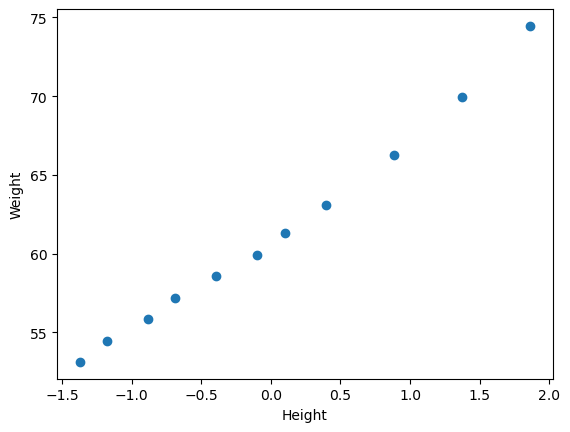

In [17]:
plt.scatter(X_train,y_train)
plt.xlabel('Height')
plt.ylabel('Weight')

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor= LinearRegression()

In [20]:
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
print("regression line coefficient(slope) ",regressor.coef_)
print("regression line intercept ",regressor.intercept_)

regression line coefficient(slope)  [6.32813992]
regression line intercept  61.290909090909075


## predicition of train data
### 1: predicted weight output y=intercept+coeff_(x_train)
### 2: y=61.2+6.32(x_train)

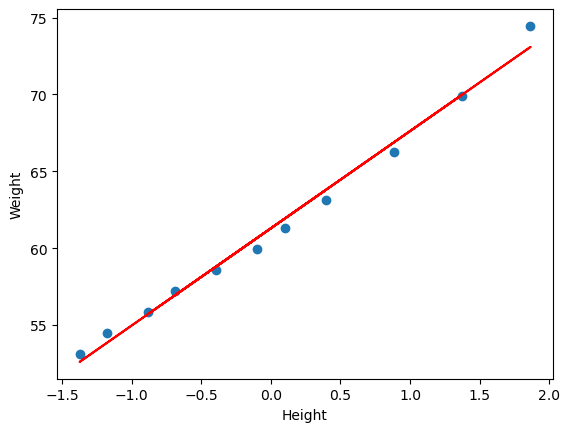

In [22]:
plt.scatter(X_train,y_train)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(X_train,regressor.predict(X_train),'r')

## predicition of test data
### 1: predicted weight output y=intercept+coeff_(x_test)
### 2: y=61.2+6.32(x_test)

In [23]:
y_pred=regressor.predict(X_test)

In [24]:
print(y_pred)

[65.0173189  68.1226604  50.73274797 71.22800191]


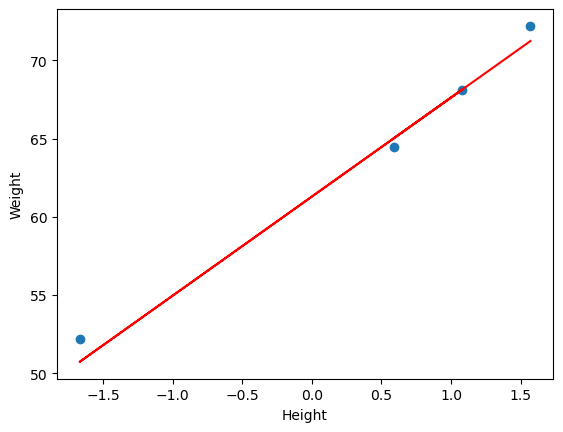

In [25]:
plt.scatter(X_test,y_test)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(X_test,regressor.predict(X_test),'r')


# performance metrics
## MSE , MAE, RMSE
## R-Square  , Adusted R-Square

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
mse=mean_squared_error(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mse)
print(msa)
print(rmse)

0.8519463386044093
0.7523073555166384
0.9230093924789765


# R Square
## Formula:
### R^2 = 1-SSR/SST
### R=coefficient of determination, SSR=sum of squares residuals,  SST=total sum of squares

In [28]:
from sklearn.metrics import r2_score

In [29]:
R2=r2_score(y_test,y_pred)
print(R2)

0.9847099406590434


# Adjusted R square
## Formula:
### **Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [30]:
n=len(y_test)
k=X_test.shape[1]
print(n)
print(k)

4
1


In [31]:
adj_r2=1-((1-R2)*(n-1)/(n-k-1))
print(adj_r2)

0.9770649109885651


### test for new data

In [32]:
scaler_height=scaler.transform([[1.5]])
print(scaler_height)

[[-1.37401453]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
print(scaler_height[0])
print("predicted weight of the height 1.5 is",regressor.predict([scaler_height[0]]))

[-1.37401453]
predicted weight of the height 1.5 is [52.59595287]


## OLS linear regression

In [34]:
import statsmodels.api as sm

In [35]:
model=sm.OLS(y_train,X_train).fit()


In [36]:
predict=model.predict(X_test)

In [37]:
print(predict)

[  3.72640981   6.83175131 -10.55816112   9.93709282]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):             -0.088
Method:                 Least Squares   F-statistic:                             0.1066
Date:                Fri, 05 Jul 2024   Prob (F-statistic):                       0.751
Time:                        10:00:48   Log-Likelihood:                         -60.881
No. Observations:                  11   AIC:                                      123.8
Df Residuals:                      10   BIC:                                      124.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [39]:
MSA=mean_squared_error(y_test,predict)
MSE=mean_absolute_error(y_test,predict)
RMSE=np.sqrt(mse)
print(MSE)
print(MSA)
print(RMSE)

61.75822679509629
3814.712137376507
0.9230093924789765


In [40]:
r2=r2_score(y_test,predict)
print(r2)

-67.46343755018813


In [41]:
residuals=y_test-y_pred

In [42]:
print(residuals)

9    -0.547319
11   -0.022660
0     1.477252
13    0.961998
Name: Weight, dtype: float64


## Assumptions

Text(0, 0.5, 'Predicted_weight')

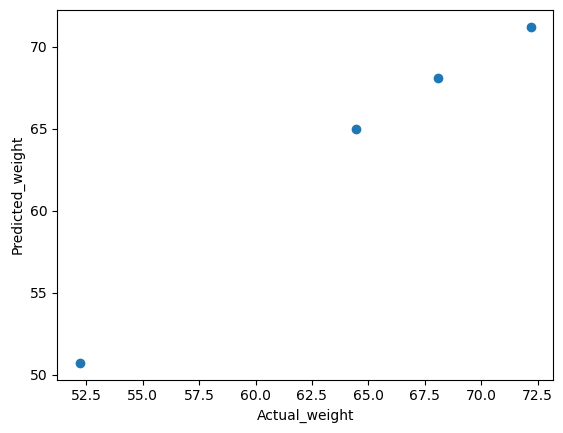

In [52]:
## plot a scatter plot between y_test and y_pred -> should be linearly distributed
plt.scatter(y_test,y_pred)
plt.xlabel('Actual_weight')
plt.ylabel('Predicted_weight')

C:\Users\hp\AppData\Local\Temp\ipykernel_10440\1745037090.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=5,kde=True)
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', Tr

<Axes: xlabel='Weight', ylabel='Density'>

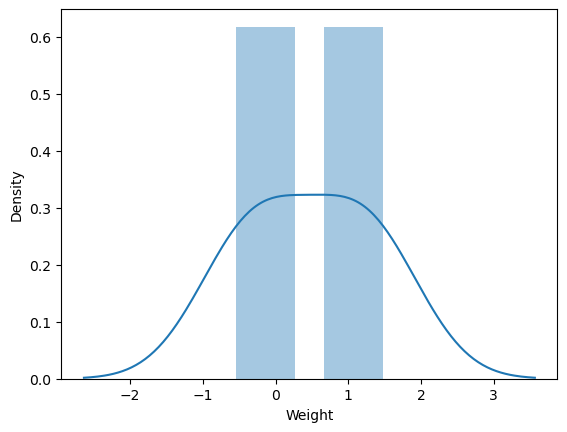

In [50]:
# plot the residuals distplot -> it should be normal distribution
sns.distplot(residuals,bins=5,kde=True)

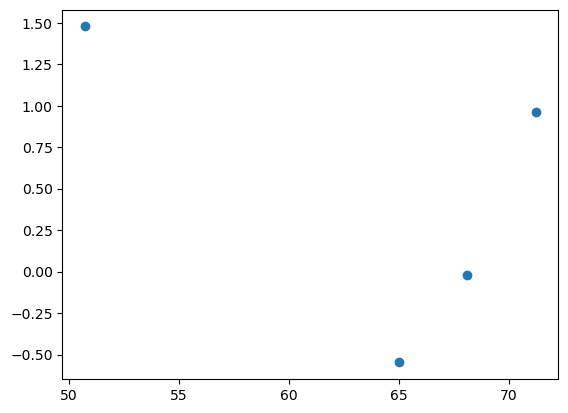

In [55]:
# plt the scatter plot between y_test and residuals -> it should be uniformly distributed
plt.scatter(y_pred,residuals)